# Exercises for Session 8: Advanced Web Scraping and Regex

In this Exercise Set we shall develop our web scraping skills even further by practicing using `Selenium` while parsing and navigating HTML trees using `BeautifulSoup`. Furthermore we will train extracting information from raw text with no HTML tags to help using `Regex`. 

# Part 1: Translating domains into companies
This exercise is about solving a problem that some of you may face in the future. All webshops (and most other websites) have a company as their owner. In some situations it might be useful to know which company owns the domain of the webshop and investigate the background of the company.

It is what we will do in this exercise. We will use www.netbaby.dk as an example, but the procedure can be scaled to 1000s of websites. This is where automated browsing and web scraping shines! With just one website we can easily find the information by hand, but with 1000s of websites we need automated web scraping.

Remember to watch the video (8.1) below before moving on to the exercises:

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

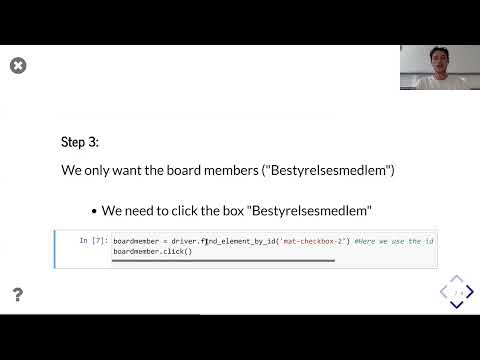

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('reO8F8orK3I', width=640, height=360)

> **Ex. 8.1.1:** Use `Selenium` to go to the website https://www.dk-hostmaster.dk/da/find-domaenenavn and search for "netbaby.dk". 

> Under "Registrant" you can see the name ("Navn") of the company behind netbaby.dk. Use `BeautifulSoup` to find the name of the company and store it in the variable `company`.
> - I.e., you need to use the skills you developed in session 7 to locate the name of the company in the HTML and extract the name from the HTML

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [7]:
### BEGIN SOLUTION
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By


url = 'https://www.dk-hostmaster.dk/da/find-domaenenavn'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.implicitly_wait(5) #Waits maximum 100 seconds for an element to be found in the HTML.
driver.get(url)

# We need to click away the popup box with cookie information
cookie = driver.find_element(By.ID, 'CybotCookiebotDialogBodyLevelButtonLevelOptinAllowallSelection')
cookie.click()

# Find the place to type in search text
inputElement = driver.find_element(By.ID, 'edit-domain')
inputElement.click() #And click
# Type the search text
inputElement.send_keys('netbaby.dk')
# Use "Return" key to search
inputElement.send_keys(Keys.RETURN)

In [36]:
# Find the name of the company
from bs4 import BeautifulSoup
import re

html = driver.page_source #Selenium stores the HTML of the webpage in .page_source
soup = BeautifulSoup(html, 'lxml')

# The id attribute of the registrant name is inside a <span> tag with the class "info-text__text", it is the 4th element in the list.
company = soup.find_all("span", {"class": "info-text__text"})[3]
company = company.text
print(company)
### END SOLUTION

Euphemia Media


> **Ex. 8.1.2:** Now we know who owns the domain and would like to know more about the company Euphemia Media. 

> 1. Go to the Central Business Register (the CVR) website https://datacvr.virk.dk/data/. Search for Euphemia Media using `Selenium`. 
> 2. You will find 2 search results. Use `Selenium` to click on the first result.
> 3. When you get to the first search result, use `BeautifulSoup` to store the CVR number in the variable *cvr*.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [37]:
### BEGIN SOLUTION
url = 'https://datacvr.virk.dk/data/'
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.implicitly_wait(100) #Waits maximum 100 seconds for an element to be found in the HTML.
driver.get(url)

In [38]:
from selenium.webdriver.common.by import By

# We need to click away the popup box with cookie information
cookie = driver.find_element(By.CSS_SELECTOR, 'a.cpAcceptBtn') #Here we use a CSS selector
cookie.click()

In [39]:
# Find the place to type in search text
inputElement = driver.find_element(By.ID, 'forside-soegefelt-id')
inputElement.click()
# Type the search text
inputElement.send_keys(company)
# Use "Return" key to search
inputElement.send_keys(Keys.RETURN)

In [40]:
# Find the place to click on the first search result
search_result = driver.find_elements(By.CSS_SELECTOR, 'span.bold.value') #Here we use a CSS selector
search_result = search_result[0] #There are two elements matching this CSS selector (the two search results). We take the first one.
search_result.click()

In [54]:
# Find the CVR number
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

# There is no unique class or id attribute that identifies the CVR number.
# So I use a CSS selector 
cvr = soup.select('div.col-lg-9.col-6')
# The CSS selector also finds more elements. I notice that the first element is the CVR number. I select that.
cvr = cvr[0].text

In [56]:
cvr
### END SOLUTION

'21848875'

#### Note:
The Central Business Register actually also have an API: https://datacvr.virk.dk/artikel/system-til-system-adgang-til-cvr-data.

Whenever there is an API available, you should use it. It is way more reliable than trying to web scrape the webpage by yourself.

We just did it in this exercise for educational purposes.

# Part 2: Practicing Regular Expressions

In this exercise you will gain experience in working with regular expressions. Regular expressions takes time to get used to, so do not panic if you do not understand the intuition at first. The only way to get familiar with their structure and applicability is to work with them. 

And they ARE very useful! I promise you that if you at some point are going to work with text as data, then you will find RegEx solutions to your problems. They are all over StackOverflow. We will only scratch the surface, but you will soon become better when you apply RegEx to your own text analysis problems.

Note: A good webpage to have in mind is this one: www.regular-expressions.info/refquick.html. It contains all special symbols that RegEx uses.

Before moving to the exercises below, remember to watch the following video (8.2):

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

In [ ]:
YouTubeVideo('5vCE_7KSO7Y', width=640, height=360)

To practice RegEx we will use a review from a dataset with Trustpilot reviews collected by a colleague Snorre Ralund.
You can load it directly into python using the code below:

In [57]:
import pandas as pd
import re

# Download data
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)

# Take the review we are going to play with
review = df.reviewBody[6]

In [58]:
review

"I've been to the 'other' sac store in the Mall of America many times and my wife and I always leave the store wanting a big comfy sac to lounge in... but the cost just doesn't add up.  I don't mind paying for good products, but there is a point where things are just too expensive.\r\n\r\nI did my research online, found Comfy Sacks and after much contemplation I decided if Comfy Sacks are good enough for Amazon/Apple Corp, then they'd be good enough for me.\r\n\r\nI chose the 6ft sack with a brown textured premium suede.  Wow, is all I can say!!  Quality is amazing, comfort is great and it fits my whole family (Wife, 5yo daughter and me).\r\n\r\n*You do have to 'fluff' it every now and then and it's shipped in such a tight vacuum packed 'block' it does take a fair amount of effort to de-compress it the first time.  Check Youtube for other reviews, it was very helpful for me.\r\n\r\nOverall, I'd recommend this to anyone looking at the $900+ alternatives."

> **Ex. 8.2.1:** First, we are interested in the *first* number in the review. Make a regular expression that matches the first number in the text.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [59]:
### BEGIN SOLUTION
import re
first_number = re.search(r'\d+', review) 
first_number.group()
### END SOLUTION

'6'

> **Ex. 8.2.2:** Now, we are interested in *all* the numbers in the review. Make a regular expression that matches all numbers in the text.

> Afterwards make a new regex that only matches numbers with a non-alphanumeric character (\$, +, etc.) before and after the number. Include the non-alphanumeric characters in the match (for example \\$900+).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [60]:
### BEGIN SOLUTION
# Find numbers
numbers = re.findall(r'\d+', review) 
numbers

['6', '5', '900']

In [61]:
# Find number with special characters pre- and proceding
number_chr = re.findall(r'\W\d+\W', review) 
number_chr
### END SOLUTION

['$900+']

> **Ex. 8.2.3:** Let's say we want the text inside the parenthesis in the review. Write a regex that matches that.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [62]:
### BEGIN SOLUTION
par_text = re.findall(r'\(.+\)', review) #Remember that the parenthesis "(" is also a special character in regex, so we have to escape it with "\".
par_text
### END SOLUTION

['(Wife, 5yo daughter and me)']

> **Ex. 8.2.4:** The review consists of different lines with line breaks. Split the text into each line and store them in a list.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [63]:
### BEGIN SOLUTION
lines = re.split(r"\r\n\r\n", review)
lines
### END SOLUTION

["I've been to the 'other' sac store in the Mall of America many times and my wife and I always leave the store wanting a big comfy sac to lounge in... but the cost just doesn't add up.  I don't mind paying for good products, but there is a point where things are just too expensive.",
 "I did my research online, found Comfy Sacks and after much contemplation I decided if Comfy Sacks are good enough for Amazon/Apple Corp, then they'd be good enough for me.",
 'I chose the 6ft sack with a brown textured premium suede.  Wow, is all I can say!!  Quality is amazing, comfort is great and it fits my whole family (Wife, 5yo daughter and me).',
 "*You do have to 'fluff' it every now and then and it's shipped in such a tight vacuum packed 'block' it does take a fair amount of effort to de-compress it the first time.  Check Youtube for other reviews, it was very helpful for me.",
 "Overall, I'd recommend this to anyone looking at the $900+ alternatives."]